<a href="https://colab.research.google.com/github/Rromero99342/ML-Projects/blob/main/Exploratory_Data_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

ERROR: Operation cancelled by user


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FoodhubProject/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]




In [ ]:
# Write your code here
data.shape

(1898, 9)

#### Observations: 1898 Rows and 9 Columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
##### Variables order_id, customer_id, food_preparation_time & delivery_time are of Integer type.
##### The  variable cost_of_the_order is of float type.
##### The variables day_of_the_week, rating, restaurant_name & cuisine_type are of object type.
##### The Dataset contains 1898 non-null rows and 9 columns.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Checking for Missing Values in the data from the original dataset
data.isnull().sum()


,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [ ]:
# Number of orders are not rated in the original dataset
data[data['rating'] == 'Not given'].count()

,0
order_id,736
customer_id,736
restaurant_name,736
cuisine_type,736
cost_of_the_order,736
day_of_the_week,736
rating,736
food_preparation_time,736
delivery_time,736


In [ ]:
# Copying data dataframe "data" to new dataframe "datawmv" to perform substituting Values Defined as "Not Given" in the Rating Column
datawmv = data.copy()

In [ ]:
# Substituting Missing Values Defined as "Not Given" in the Rating Column for a new copied dataframe "datawmv"
datawmv['rating'] = datawmv['rating'].replace('Not given', np.nan)

# Converted rating column from object type to float
datawmv['rating'] = datawmv['rating'].astype(float)

# Results of new dataframe
datawmv.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5.0,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5.0,29,26


In [ ]:
# Imputing missing values in rating column with Mean value.
# Copying to another new dataset that will have the modified for 'Not Given' ratings changed to Nulls in the datawmv.
dataInpMean= datawmv.copy()

# Performing inputting of Mean for each restaurant for each corresponding null rating.
dataInpMean['rating'] = dataInpMean['rating'].fillna(value = dataInpMean.groupby(['restaurant_name'])['rating'].transform('mean'))

# Dropping all restaurants that have all orders with no rating after inputting Mean since we identified that there were restaurants
# that in fact had no ratings (NaN) in ALL their orders
dataInpMean.dropna(subset=['rating'], inplace=True)

# Results after inputting Mean and removing restaurants with Mean NaN on ratings.
dataInpMean.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,4.333333,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.000000,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.000000,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.000000,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.000000,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,4.511905,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.000000,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5.000000,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5.000000,29,26
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5.000000,23,22


#### Observations:
#### There are no missing values on the data, however there are 736 rows where rating was defined as 'Not Given'.


#### Mean inputting was performed for each restaurant for each corresponding null rating.

#### Dropped all restaurants that had  ALL orders with no rating (NaN) after inputting Mean since we identified that there were 22 restaurants of these.


#### Observations:


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]



In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
#  Minimum, average, and maximum time it takes for food to be prepared once an order is placed from original dataset.
data['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


#### Observations:
### Minimum: 20 minutes
### Average:  27 minutes and 32 seconds (converted decimal component to seconds)
### Maximum: 35 minutes


### **Question 5:** How many orders are not rated? [1 mark]


In [ ]:
# Number of orders are not rated form original dataset?
data[data['rating'] == 'Not given'].count()

,0
order_id,736
customer_id,736
restaurant_name,736
cuisine_type,736
cost_of_the_order,736
day_of_the_week,736
rating,736
food_preparation_time,736
delivery_time,736


In [ ]:
# Count of orders with rating = 'Not Given' from original dataset
data[data['rating'] == 'Not given'].groupby('restaurant_name').count().sort_values(by='rating', ascending=False).head(10)

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Shake Shack,86,86,86,86,86,86,86,86
The Meatball Shop,48,48,48,48,48,48,48,48
Blue Ribbon Sushi,46,46,46,46,46,46,46,46
Blue Ribbon Fried Chicken,32,32,32,32,32,32,32,32
Parm,29,29,29,29,29,29,29,29
Han Dynasty,23,23,23,23,23,23,23,23
Blue Ribbon Sushi Bar & Grill,22,22,22,22,22,22,22,22
RedFarm Hudson,21,21,21,21,21,21,21,21
TAO,21,21,21,21,21,21,21,21


#### Observations:
### **Answer**: 736 orders are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

### Let's check the distribution for numerical columns.

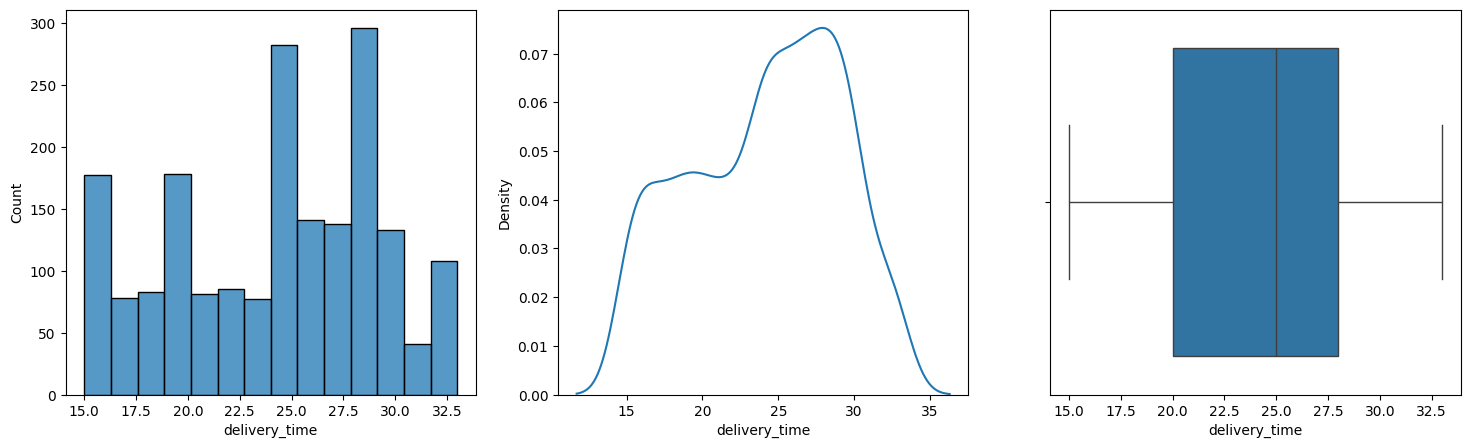

,delivery_time
count,1898.000000
mean,24.161749
std,4.972637
min,15.000000
25%,20.000000
50%,25.000000
75%,28.000000
max,33.000000


In [ ]:
#  Figure # - 1 Delivery Time - Counts histogram, distribution and Boxplot using modified dataset replacing ratings containing 'Not Given' with NaN
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data=datawmv,x='delivery_time',ax=axes[0])
sns.kdeplot(data=datawmv,x='delivery_time', ax=axes[1])
sns.boxplot(data=datawmv,x='delivery_time', ax=axes[2])
plt.show()
datawmv['delivery_time'].describe()

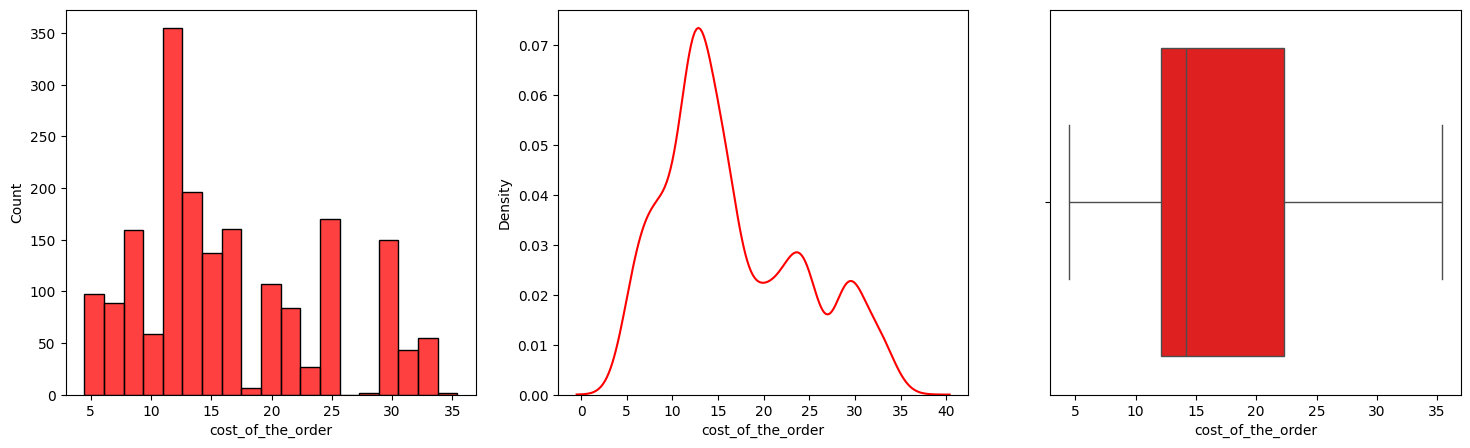

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


In [ ]:
# Figure # 2 - Cost of the Order - Counts histogram, distribution and Boxplot using modified dataset replacing ratings containing 'Not Given' with NaN
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(data=datawmv,x='cost_of_the_order',color='Red',ax=axes[0])
sns.kdeplot(data=datawmv,x='cost_of_the_order',color='Red', ax=axes[1])
sns.boxplot(data=datawmv,x='cost_of_the_order',color='Red', ax=axes[2])
plt.show()
datawmv['cost_of_the_order'].describe()

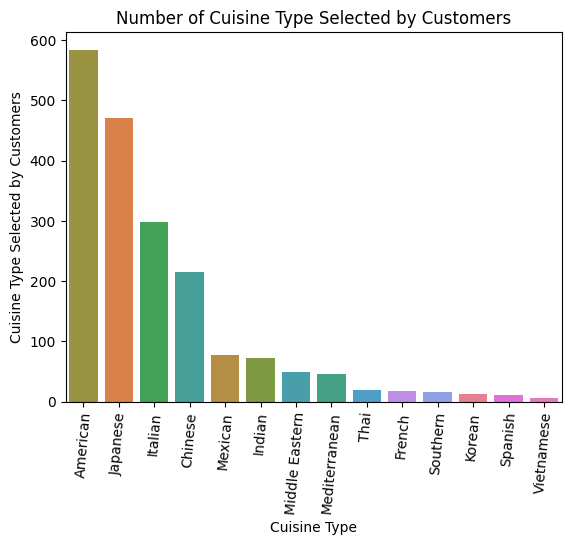

In [ ]:
# Figure # 3 - Count of cuisine type using modified dataset replacing ratings containing 'Not Given' with NaN.
sns.countplot(x = 'cuisine_type', data = datawmv,  order=datawmv['cuisine_type'].value_counts().index , hue='cuisine_type')
sns.color_palette("mako")
plt.xticks(rotation=85)
plt.xlabel('Cuisine Type')
plt.ylabel('Cuisine Type Selected by Customers')
plt.title('Number of Cuisine Type Selected by Customers')
plt.show()

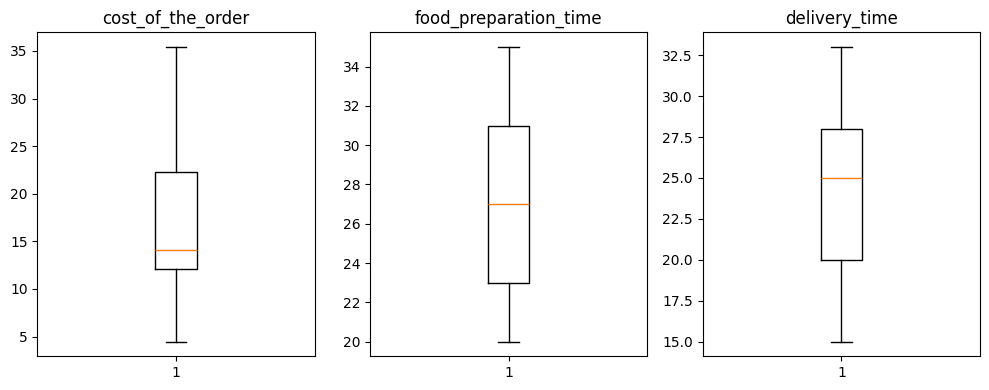

In [ ]:
# Figure 4 -  Multiple boxplots for the variables cost of the order, food preparation and delivery time using modified dataset replacing ratings containing 'Not Given' with NaN.
numeric_columns = ['cost_of_the_order','food_preparation_time','delivery_time']
# Defining the Plotting area
plt.figure(figsize=(10, 4))
# Using the enumerate() function as an iterator, inheriting all associated iterator functions and method
for i, variable in enumerate(numeric_columns):
    # Plotting the boxplot for each variable. The plotting area is 3 boxplot in each rows in three columns
    new_var = plt.subplot(1, 3, i + 1)
    plt.boxplot(datawmv[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

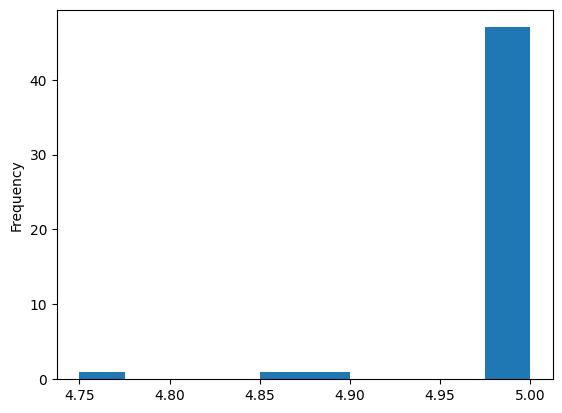

In [ ]:
#  Figure 5 -  Density Function of Count of Mean of Rating grouped by Restaurant using modified dataset replacing ratings containing 'Not Given' with NaN.
datawmv.groupby('restaurant_name')['rating'].mean().sort_values(ascending=False).head(50).plot(kind='hist' )
plt.show()

#### Observations:
 #####  A.There is no direct correlation between Rating and Total Time (Food Prep and Delivery Time) for the ratings that were submitted for the order (see Figure 9).
#####  B.	A very negligible negative correlation between the cost of the order and the rating submitted for the order (see Figure 9).
#####  C.	Left Skewness on Delivery Time as there is a longer delivery times than the Mean (see Figure 1).
#####  D.	Right Skewness on Cost of Orders, as there is smaller cost of orders than the Mean (see Figure 2)
#####  E. American, Japanese and Italian cuisines have the highest count in the dataset. (See Figure 3)
##### F.  A Mean rating of 5 was most frequent for the restaurant set.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# The top 5 restaurants in terms of the number of orders received
data['restaurant_name'].value_counts().head(5)

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
#### The top 5 restaurants in terms of the number of orders received:
#### Shack Shack, The Meatball Shop, Blue Ribbon Sushi , Blue Ribbon Fried Chicken & Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Most popular cuisine on weekends
datawmv[datawmv['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


#### Observations:
#### Most popular cuisines on weekends: American, Japanese, Italian & Chinese


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Percentage of the orders cost more than 20 dollars.
round(datawmv[datawmv['cost_of_the_order'] > 20].shape[0] / data.shape[0] * 100,2)

29.24

#### Observations:
#### Percentage of the orders more than 20 dollars : 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Mean order delivery time
round(datawmv['delivery_time'].mean(),2)



24.16

#### Observations:
### Mean for order delivery time: 24.16 minutes


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#  IDs of the top 3 most frequent customers of customers and the number of orders they have placed.
datawmv['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:
#### The top 3 most frequent customers are:
#### Customer ID: 52832, 47440 & 83287


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


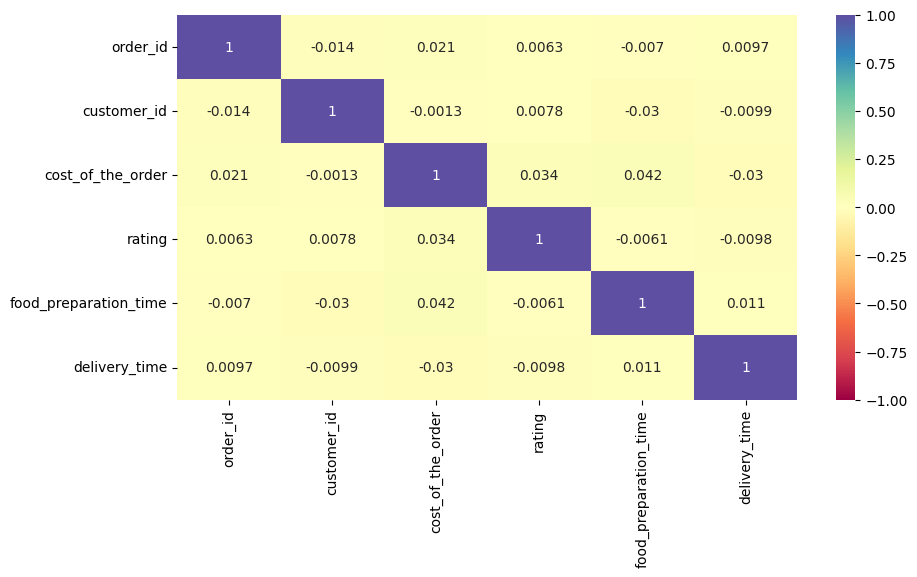

In [ ]:
# Figure # 9 - Heatmap of the Correlation Matrix
plt.figure(figsize=(10,5))
sns.heatmap(datawmv.select_dtypes(include=np.number).corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show();

In [ ]:
# Mean of the Cost of the Order grouped by Cusine Type
mean_cost_by_cuisine = datawmv.groupby(['cuisine_type','day_of_the_week'])['cost_of_the_order'].mean().sort_values(ascending=False)
# Converting Series to dataframe for Catplot
df_mean_cost_by_cuisine = pd.DataFrame(mean_cost_by_cuisine)
df_mean_cost_by_cuisine.head(10)

cost_of_the_order
cuisine_type   day_of_the_week                   
French         Weekday                  20.866000
Thai           Weekend                  20.206667
Middle Eastern Weekday                  19.832941
Spanish        Weekend                  19.618182
French         Weekend                  19.381538
Southern       Weekend                  19.340909
               Weekday                  19.226667
Middle Eastern Weekend                  18.282812
Indian         Weekday                  17.162500
Chinese        Weekday                  17.147692

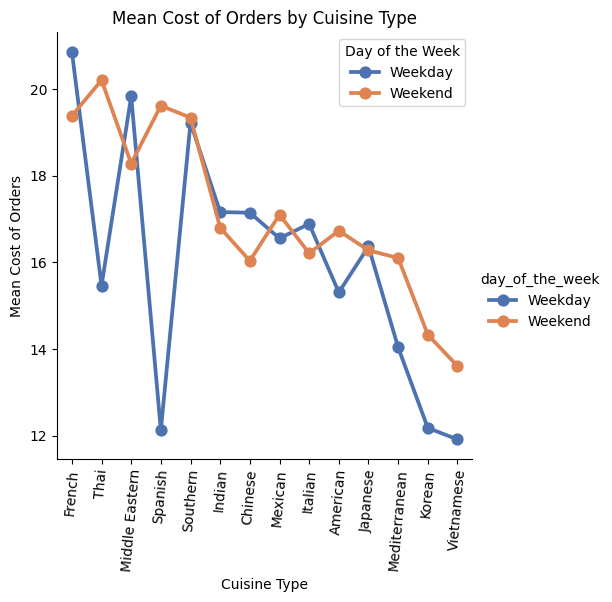

In [ ]:
#  Figure 10. Catplot showing relationship between average cost of orders by cusiine type and the average order amount based on weekday or weekend.

sns.catplot(data=df_mean_cost_by_cuisine, x='cuisine_type', y='cost_of_the_order', kind='point', palette='deep', hue='day_of_the_week',legend=True)
plt.xlabel('Cuisine Type')
plt.ylabel('Mean Cost of Orders')
plt.legend(title='Day of the Week')
plt.title('Mean Cost of Orders by Cuisine Type')
plt.xticks(rotation=85)
plt.show()

<Figure size 1200x2000 with 0 Axes>

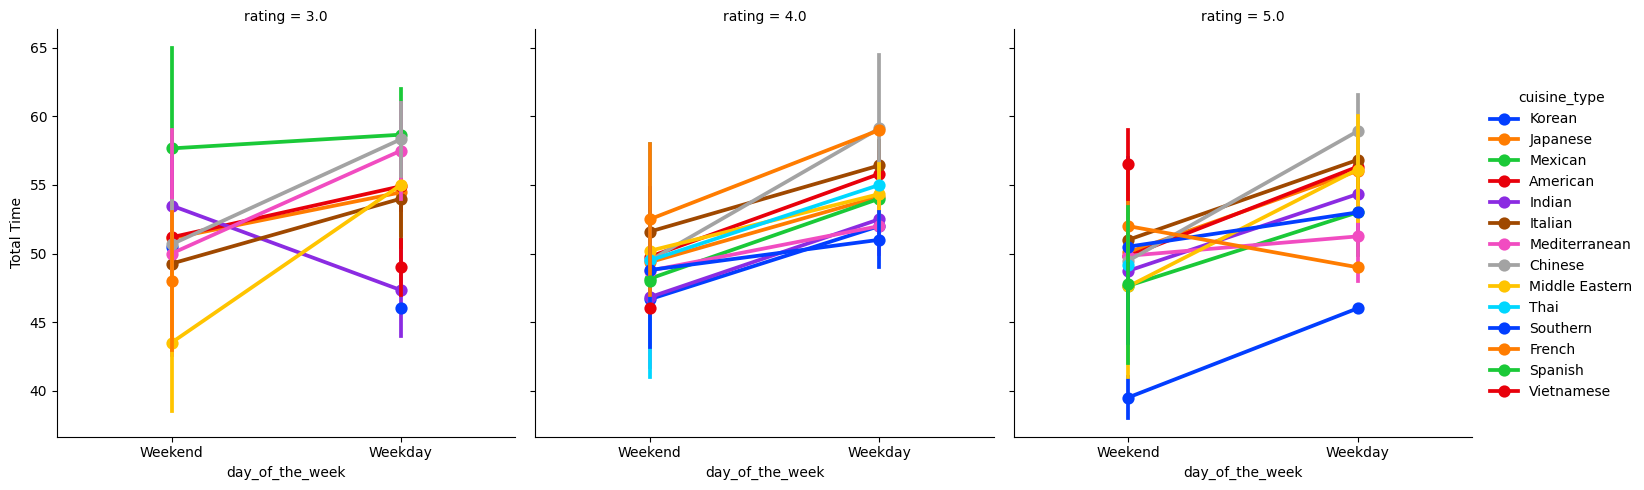

In [ ]:
#  Figure 11 - Catplot showing relationships between Rating, Total Time (Preparation + Delivery times) , Weekend or Weekday across all Cuisine Types
plt.figure(figsize=(12,20))
sns.catplot(data=datawmv, x="day_of_the_week", y="Total Time", hue="cuisine_type", col="rating", kind='point', palette='bright', legend=True,col_wrap=3)
plt.show();

<Figure size 1200x2000 with 0 Axes>

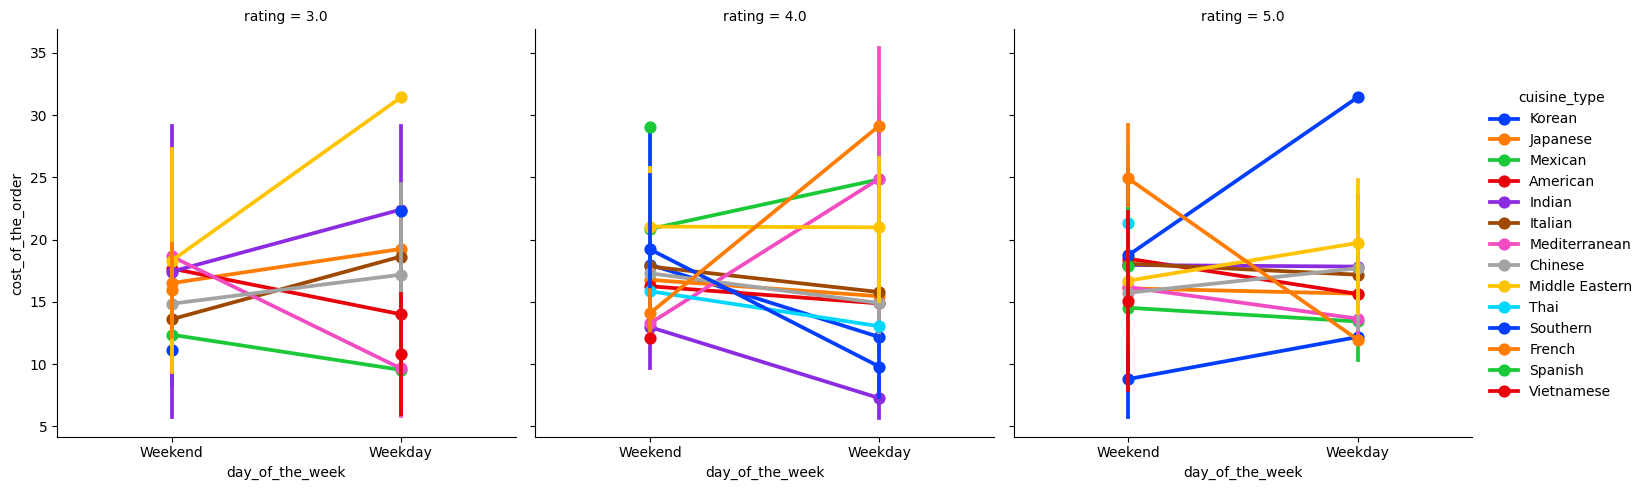

In [ ]:
#  Figure 12 - Catplot showing relationships between Rating, Cost of the Order , weekend or weekday across all Cuisine Types
plt.figure(figsize=(12,20))
sns.catplot(data=datawmv, x="day_of_the_week", y="cost_of_the_order", hue="cuisine_type", col="rating", kind='point', palette='bright', legend=True,col_wrap=3)
plt.show();

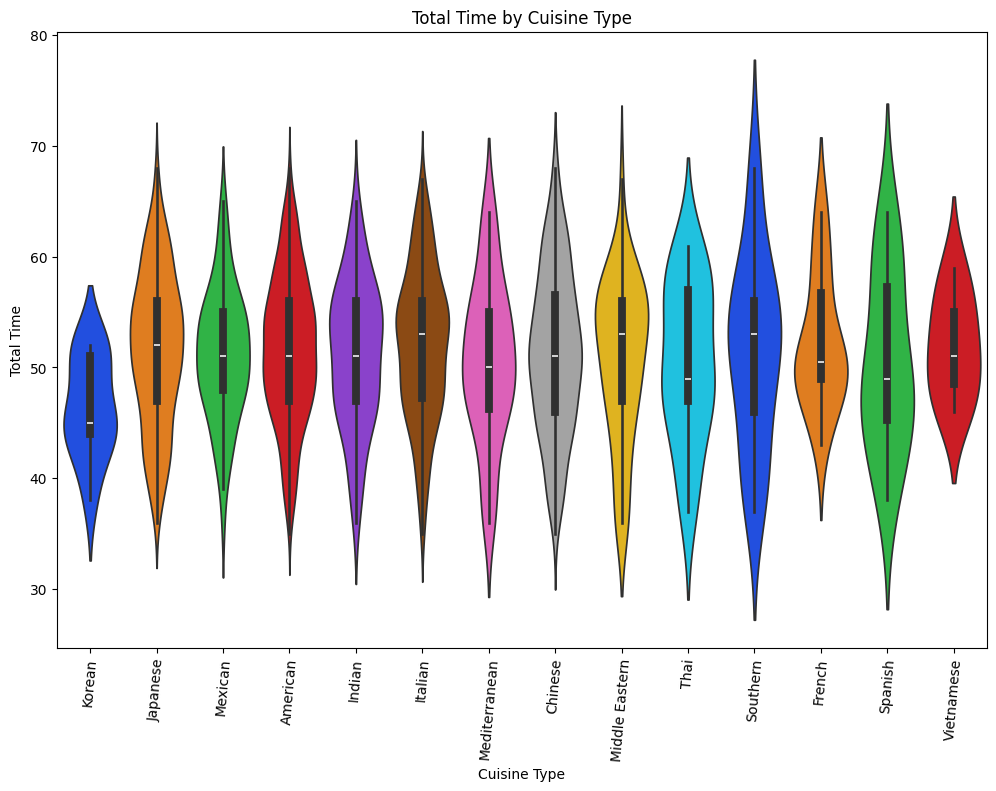

In [ ]:
# Figure 13 - Catplot showing relationships between Total Time (Food Prep and Delivery Time) across cuisine types
plt.figure(figsize=(12,8))
sns.violinplot(data=datawmv, x='cuisine_type', y='Total Time', palette="bright", hue='cuisine_type', legend=False)
plt.xlabel('Cuisine Type')
plt.ylabel('Total Time')
plt.title('Total Time by Cuisine Type')
plt.xticks(rotation=85)
plt.show()

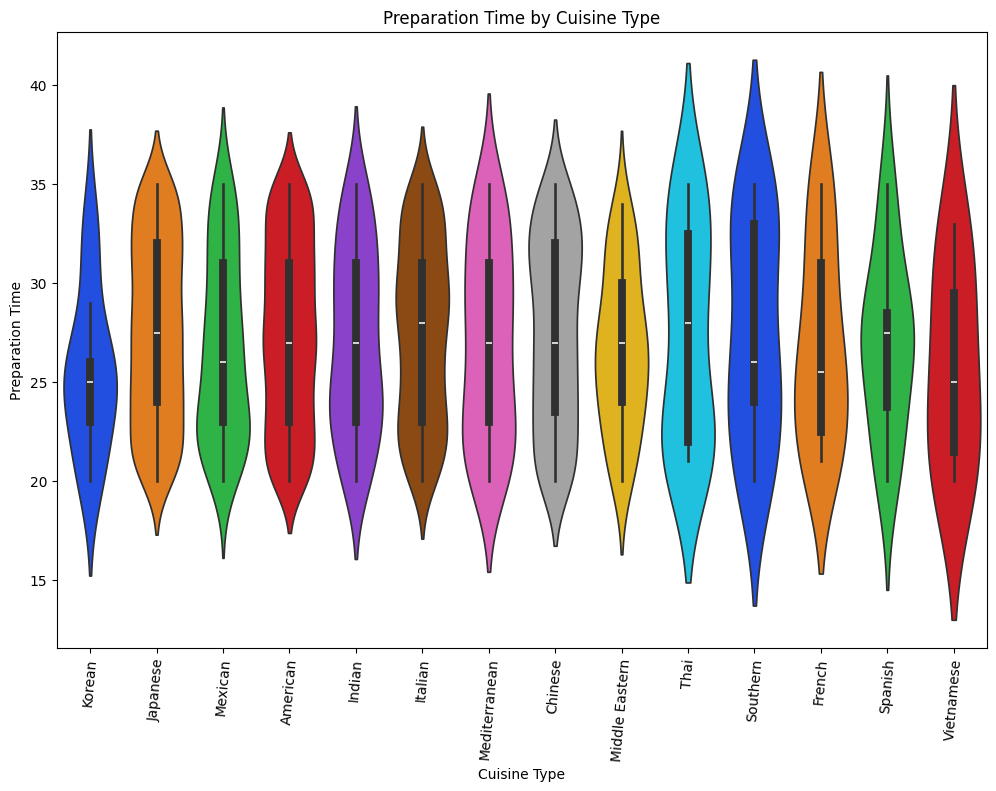

In [ ]:
# Figure 14 - Catplot showing relationships between Total Time (Food Prep and Delivery Time) across cuisine types
plt.figure(figsize=(12,8))
sns.violinplot(data=datawmv, x='cuisine_type', y='food_preparation_time', palette="bright", hue='cuisine_type', legend=False)
plt.xlabel('Cuisine Type')
plt.ylabel('Preparation Time')
plt.title('Preparation Time by Cuisine Type')
plt.xticks(rotation=85)
plt.show()

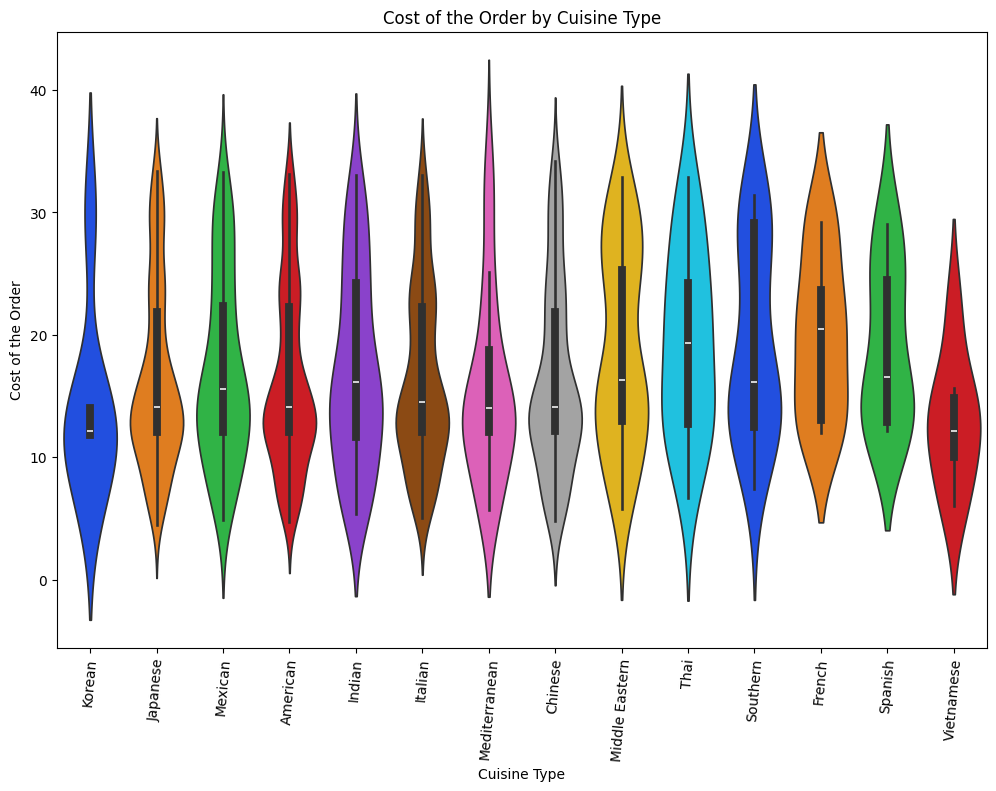

In [ ]:
# Figure 15 - Catplot showing relationships between cost of the order across cuisine types
plt.figure(figsize=(12,8))
sns.violinplot(data=datawmv, x='cuisine_type', y='cost_of_the_order', palette="bright", hue='cuisine_type', legend=False)
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.title('Cost of the Order by Cuisine Type')
plt.xticks(rotation=85)
plt.show()

#### Observations:
* A Mean rating of 5 was most frequent for the restaurant set (See Figure 5).

* In across all ratings the Mean of almost all Total Time (Preparation + Delivery times) increased through most of the cuisine types between weekdays and weekends (See Figure 11).

* The Median of Total Time (Preparation + Delivery times) across all cuisine types do not vary much between 50 and 55 minutes (See Figure 13).

* The Mean of the cost of orders in general were larger on weekends than on weekdays across most of the cuisine types for ratings 3 and 4; but the inverse for rating 5(See Figure 12)

* The Median of Thai and French for the cost of orders is higher than the other types of cuisine (See Figure 15)




### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Get Count and Mean grouped by restaurant name
restaurantCountMean = datawmv.groupby('restaurant_name')['rating'].agg(['count', 'mean'])

# Get restaurants with  non-null ratings greater than 50 and with a Mean greater than 4.0.
restaurantCriteriaResults = restaurantCountMean[(restaurantCountMean['count'] > 50) & (restaurantCountMean['mean'] > 4)]

# Display the filtered restaurants
restaurantCriteriaResults.sort_values('count', ascending= False).head(10)

,count,mean
restaurant_name,,
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905
Blue Ribbon Sushi,73,4.219178
Blue Ribbon Fried Chicken,64,4.328125


#### Observations:
#### Shake Shack, The Meatball Shop, Blue Ribbon Sushi, &  Blue Ribbon Fried Chicken


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Total of Cost of Orders that are greater 20 Dollars.
CostOfOrders20= datawmv[datawmv['cost_of_the_order'] > 20]['cost_of_the_order'].sum()
# Revenues -  25% for Orders that are greater than 20 Dollars
Revenues20 = round((CostOfOrders20 * 0.25), 2)
Revenues20

3688.73

In [ ]:
# Total of Cost of Orders that are greater 20 Dollars.
CostOfOrdersBetween5and20 = datawmv[(datawmv['cost_of_the_order'] > 5) & (datawmv['cost_of_the_order'] < 20)]['cost_of_the_order'].sum()
# Revenues -  15% for Orders that are between 5 and 20 dollars
RevenuesBetween5and20 = round((CostOfOrdersBetween5and20 * 0.15),2)
RevenuesBetween5and20

2477.58

In [ ]:
TotalRevenues = round(Revenues20 + RevenuesBetween5and20,2)
TotalRevenues

6166.31

#### Observations:
### Total Net Revenues by the company across all orders: $6,166.31

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
#  Add Column for Total of Food Prepration and Delivery Time
datawmv['Total Time'] = datawmv['food_preparation_time'] + datawmv['delivery_time']
datawmv.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Total Time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,49


In [ ]:
# Percentage of Order Ids for which Total Time is greater than 60
round(datawmv[datawmv['Total Time'] > 60].shape[0] / data.shape[0] * 100,2)

10.54

#### Observations:
####  Percentage of orders take more than 60 minutes to get delivered from the time the order is placed: 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Mean Delivery Times for Weekdays
MeanWeekDay = datawmv[datawmv['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
MeanWeekDay

28.340036563071298

In [ ]:
# Mean Delivery Times for Weekdends
MeanWeekEnd = datawmv[datawmv['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
MeanWeekEnd

22.4700222057735

In [ ]:
# Variation between Mean delivery time during weekdays and weekends
MeanVariation = round((MeanWeekDay - MeanWeekEnd) / MeanWeekEnd * 100,2)
MeanVariation

26.12

#### Observations:
##### The Mean variation of delivery time between weekend and weekdays: 26.12%


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  There is no direct correlation between Rating and Total Time (Food Prep and Delivery Time) for the ratings that were submitted for the order (see Figure 9).
*  A very negligible negative correlation between the cost of the order and the rating that was submitted for the order (see Figure 9).
*  Left Skewness on Delivery Time as there is a longer delivery times than the Mean (see Figure 1).
*  Right Skewness on Cost of Orders, as there is smaller cost of orders than the Mean (see Figure 2)
*  American, Japanese and Italian cuisines have the highest count in the dataset. (See Figure 3)
*  There are 22 restaurants for which ALL orders had no rating, representing 12.36% of all the restaurants in the datasets.
* The Mean of the cost of orders in general were larger on weekends than on weekdays across most of the cuisine types for ratings 3 and 4; but the inverse for rating 5(See Figure 12).



### Recommendations:

* Offer discount vouchers for orders placed on the weekends to restaurants that offer French, Thai, Spanish and Southern cuisine to their best customers, as these orders have the highest average of the cost of the orders (see Figure 10).

* Offer discount vouchers for customers to provide a rating, especially from those 22 restaurants that no rating was provided at all, because none of their orders have ratings to even input a Mean, etc. This represents 12.36% of all the restaurants in the datasets.

* Offer discount vouchers to customers who place large orders on weekdays.

* FoodHub should recruit more French and Thai restaurants to increase more orders of these cuisine type as their Median of the cost of the order is higher than most of the other cuisine types (See Figure 14)


## Other Exploratory Code

In [ ]:
# Count of top 50 restaurants with ratings = 'Not Given' grouped by Restaurant
data[data['rating'] == 'Not given'].groupby('restaurant_name').count().sort_values(by='rating', ascending=False).head(10)

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Shake Shack,86,86,86,86,86,86,86,86
The Meatball Shop,48,48,48,48,48,48,48,48
Blue Ribbon Sushi,46,46,46,46,46,46,46,46
Blue Ribbon Fried Chicken,32,32,32,32,32,32,32,32
Parm,29,29,29,29,29,29,29,29
Han Dynasty,23,23,23,23,23,23,23,23
Blue Ribbon Sushi Bar & Grill,22,22,22,22,22,22,22,22
RedFarm Hudson,21,21,21,21,21,21,21,21
TAO,21,21,21,21,21,21,21,21


In [ ]:
# Count of top 50 restaurants grouped by Restaurant in order to determine what percentage
data.groupby('restaurant_name').count().sort_values(by='order_id', ascending= False).head(10)

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Shake Shack,219,219,219,219,219,219,219,219
The Meatball Shop,132,132,132,132,132,132,132,132
Blue Ribbon Sushi,119,119,119,119,119,119,119,119
Blue Ribbon Fried Chicken,96,96,96,96,96,96,96,96
Parm,68,68,68,68,68,68,68,68
RedFarm Broadway,59,59,59,59,59,59,59,59
RedFarm Hudson,55,55,55,55,55,55,55,55
TAO,49,49,49,49,49,49,49,49
Han Dynasty,46,46,46,46,46,46,46,46


In [ ]:
# Count of Number of Restaurants in datasets
dataNumRest = datawmv['restaurant_name'].nunique()
dataNumRest

178

In [ ]:
# Goal: To Identify if any restuarants have no ratings (NaN) in ALL their orders.

# Get Total Count of Rating with Null Values Grouped by Restaurant
totalRatingNullCounts = datawmv['rating'].isnull().groupby(datawmv['restaurant_name']).sum().astype(int).sort_values(ascending=False)

# Get Total Count of Order Ids Grouped by Restaurant.
totalCountsofOrders = datawmv.groupby('restaurant_name')['order_id'].count().astype(int)

# Percentage of Ratings with Null Values for Each Restaurant
percentageNull = (totalRatingNullCounts / totalCountsofOrders) * 100

# Create a DataFrame to Include Percentages of Nulls Aggregated
dataPercentateNulls = pd.DataFrame({'Ratings NaN Count': totalRatingNullCounts, 'Total Orders': totalCountsofOrders, '% Ratings NaN': percentageNull}).sort_values(by='% Ratings NaN', ascending=False).head(23)

dataPercentateNulls.head(23)

,Ratings NaN Count,Total Orders,% Ratings NaN
restaurant_name,,,
Lamarca Pasta,1,1,100.0
Big Wong Restaurant _¤¾Ñ¼,1,1,100.0
Friend of a Farmer,3,3,100.0
Gaia Italian Cafe,1,1,100.0
Hangawi,2,2,100.0
Hiroko's Place,1,1,100.0
La Follia,1,1,100.0
Crema Restaurante,1,1,100.0
Coppola's East,1,1,100.0


In [ ]:
# Count of Restaurants with % Rating NaN equal to 100%
dataPercentateNulls[dataPercentateNulls['% Ratings NaN']== 100].count()

,0
Ratings NaN Count,22
Total Orders,22
% Ratings NaN,22


In [ ]:
# Rating Information provided after removing 'Not Given" and converting column to float
datawmv.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


In [ ]:
# Several Restaurants in the list with no rating
datawmv.groupby('restaurant_name').mean('rating').sort_values(by='rating', ascending=False)

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,
'wichcraft,1.478304e+06,321492.000000,8.100000,5.0,28.000000,28.0
Ravagh Persian Grill,1.477277e+06,84718.333333,15.686667,5.0,31.666667,25.0
Chola Eclectic Indian Cuisine,1.476669e+06,142677.000000,8.730000,5.0,30.000000,28.0
Chote Nawab,1.477569e+06,65009.000000,16.150000,5.0,24.000000,30.0
Junoon,1.477574e+06,90260.600000,23.050000,5.0,25.200000,26.6
...,...,...,...,...,...,...
Rohm Thai,1.478288e+06,58231.000000,29.100000,NaN,31.000000,23.0
Room Service,1.477545e+06,244684.333333,13.743333,NaN,27.333333,21.0
Spice Thai,1.477832e+06,100778.000000,15.860000,NaN,34.000000,25.0


In [ ]:
# Count of Orders ID with No Rating Grouped By Restaurants.
datawmv[datawmv['rating'].isnull()].groupby('restaurant_name').count().sort_values(by='order_id', ascending=False).head(10)

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Shake Shack,86,86,86,86,86,0,86,86
The Meatball Shop,48,48,48,48,48,0,48,48
Blue Ribbon Sushi,46,46,46,46,46,0,46,46
Blue Ribbon Fried Chicken,32,32,32,32,32,0,32,32
Parm,29,29,29,29,29,0,29,29
Han Dynasty,23,23,23,23,23,0,23,23
Blue Ribbon Sushi Bar & Grill,22,22,22,22,22,0,22,22
RedFarm Hudson,21,21,21,21,21,0,21,21
TAO,21,21,21,21,21,0,21,21


In [ ]:
# Count of Order IDs grouped by Restaurant Name
datawmv.groupby('restaurant_name').count().sort_values(by='order_id', ascending=False).head(10)

,order_id,customer_id,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,,,
Shake Shack,219,219,219,219,219,133,219,219
The Meatball Shop,132,132,132,132,132,84,132,132
Blue Ribbon Sushi,119,119,119,119,119,73,119,119
Blue Ribbon Fried Chicken,96,96,96,96,96,64,96,96
Parm,68,68,68,68,68,39,68,68
RedFarm Broadway,59,59,59,59,59,41,59,59
RedFarm Hudson,55,55,55,55,55,34,55,55
TAO,49,49,49,49,49,28,49,49
Han Dynasty,46,46,46,46,46,23,46,46


In [ ]:
# Get Total Count of Rating with  Values Grouped by Restaurant
totalRatingNoNullCounts = datawmv['rating'].groupby(datawmv['restaurant_name']).count().astype(int).sort_values(ascending=False)
totalRatingNoNullCounts

,rating
restaurant_name,
Shake Shack,133
The Meatball Shop,84
Blue Ribbon Sushi,73
Blue Ribbon Fried Chicken,64
RedFarm Broadway,41
...,...
Market Table,0
Paul & Jimmy's,0
Room Service,0


In [ ]:
# Percentage of Restaurants With No Rating
round(dataPercentateNulls[dataPercentateNulls['% Ratings NaN']== 100].count() / dataNumRest * 100,2)

,0
Ratings NaN Count,12.36
Total Orders,12.36
% Ratings NaN,12.36


In [ ]:
# Mean for the Restaurants  with Rating that have Values.
filtered_restaurants = datawmv.groupby('restaurant_name').mean('rating').dropna().sort_values(by='rating', ascending=False)
filtered_restaurants


,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
restaurant_name,,,,,,
'wichcraft,1478304.0,321492.000000,8.100000,5.0,28.000000,28.0
Ravagh Persian Grill,1477277.0,84718.333333,15.686667,5.0,31.666667,25.0
Chola Eclectic Indian Cuisine,1476669.0,142677.000000,8.730000,5.0,30.000000,28.0
Chote Nawab,1477569.0,65009.000000,16.150000,5.0,24.000000,30.0
Junoon,1477574.4,90260.600000,23.050000,5.0,25.200000,26.6
...,...,...,...,...,...,...
Woorijip,1476856.0,59674.000000,8.250000,3.0,26.000000,26.0
Byblos Restaurant,1477741.0,260844.000000,24.735000,3.0,32.500000,18.0
Pepe Giallo,1476808.0,84700.000000,14.600000,3.0,32.000000,24.0
